<a href="https://colab.research.google.com/github/sqb-codes/ATAL_FDP_24/blob/main/EdgeDetectionDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to connect with Kaggle

*   Step-1 : Open Kaggle and login
*   Step-2 : Open settings and Create New API Token
*   Step-3 : Copy username and API Key in colab



In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "squarebrackets"
os.environ["KAGGLE_KEY"] = "b2ee878c1b5d541bf70ac9ed1a0289e3"

!kaggle datasets download sachinkumar413/diabetic-retinopathy-dataset

Dataset URL: https://www.kaggle.com/datasets/sachinkumar413/diabetic-retinopathy-dataset
License(s): ODbL-1.0
 96% 336M/350M [00:04<00:00, 80.1MB/s]
100% 350M/350M [00:04<00:00, 78.3MB/s]


In [2]:
!unzip diabetic-retinopathy-dataset.zip

Archive:  diabetic-retinopathy-dataset.zip
  inflating: Healthy/Healthy.png     
  inflating: Healthy/Healthy_10.png  
  inflating: Healthy/Healthy_100.png  
  inflating: Healthy/Healthy_1000.png  
  inflating: Healthy/Healthy_101.png  
  inflating: Healthy/Healthy_102.png  
  inflating: Healthy/Healthy_103.png  
  inflating: Healthy/Healthy_104.png  
  inflating: Healthy/Healthy_105.png  
  inflating: Healthy/Healthy_106.png  
  inflating: Healthy/Healthy_107.png  
  inflating: Healthy/Healthy_108.png  
  inflating: Healthy/Healthy_109.png  
  inflating: Healthy/Healthy_11.png  
  inflating: Healthy/Healthy_110.png  
  inflating: Healthy/Healthy_111.png  
  inflating: Healthy/Healthy_112.png  
  inflating: Healthy/Healthy_113.png  
  inflating: Healthy/Healthy_114.png  
  inflating: Healthy/Healthy_115.png  
  inflating: Healthy/Healthy_116.png  
  inflating: Healthy/Healthy_117.png  
  inflating: Healthy/Healthy_118.png  
  inflating: Healthy/Healthy_119.png  
  inflating: Healthy/He

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import sobel
from skimage.feature import canny

In [29]:
img_1 = cv2.imread("Healthy/Healthy_10.png")
img_2 = cv2.imread("Mild DR/Mild_DR_10.png")
img_3 = cv2.imread("Moderate DR/Moderate_DR_10.png")
img_4 = cv2.imread("Proliferate DR/Proliferate DR_10.png")
img_5 = cv2.imread("Severe DR/Severe DR_10.png")

In [30]:
img_1.shape

(256, 256, 3)

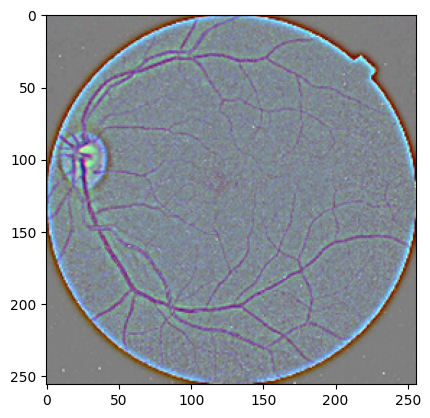

In [31]:
plt.imshow(img_1)

In [32]:
img_4.shape

(256, 256, 3)

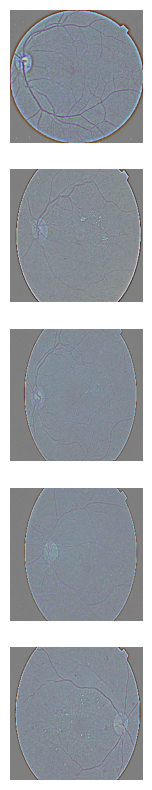

In [37]:
plt.figure(figsize=(15,10))
num_images = 5
images = [img_1, img_2, img_3, img_4, img_5]
for i in range(num_images):
  plt.subplot(num_images, 1, i+1)
  plt.imshow(images[i])
  plt.axis("off")

plt.show()

In [38]:
def load_image(img_path):
  img = cv2.imread(img_path)
  return img

In [39]:
# Canny Edge Detection
def apply_canny(img, sigma=1.0):
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  edges = canny(gray_img, sigma)
  return edges

In [40]:
def visualize_results(orig_img, technique, title):
  plt.figure(figsize=(10,10))
  plt.subplot(2,3,1)
  plt.imshow(orig_img)
  plt.title("Original Image")
  plt.axis("off")

  for i, (result, title) in enumerate(zip(technique, title)):
    plt.subplot(2,3,i+2)
    plt.imshow(result, cmap="gray")
    plt.title(title)
    plt.axis("off")

  plt.show()

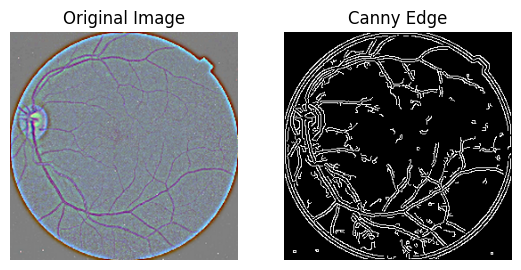

In [41]:
canny_edge = apply_canny(img_1)
techniques = [canny_edge]

titles = ["Canny Edge"]

visualize_results(img_1, techniques, titles)